# Classify condition of biomechanical patients using k-nearest neighbours in Python
_________

This work is part of a collection of practice sets called [Machine Learning Starters](https://github.com/jamiemorales/project-machine-learning-starters).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify conditions of orthopedic patients.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [2]:
# Set-up libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [4]:
# Read-in data
df = pd.read_csv('../00-Datasets/biomech.csv')

In [22]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [23]:
# Look at some records
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [24]:
# Check for missing values
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

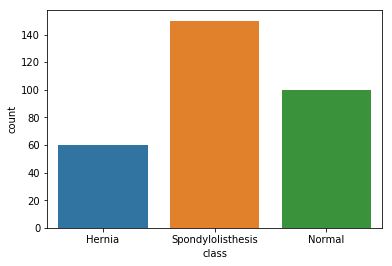

In [25]:
# Look at breakdown of label
df['class'].value_counts()
sns.countplot(df['class'])

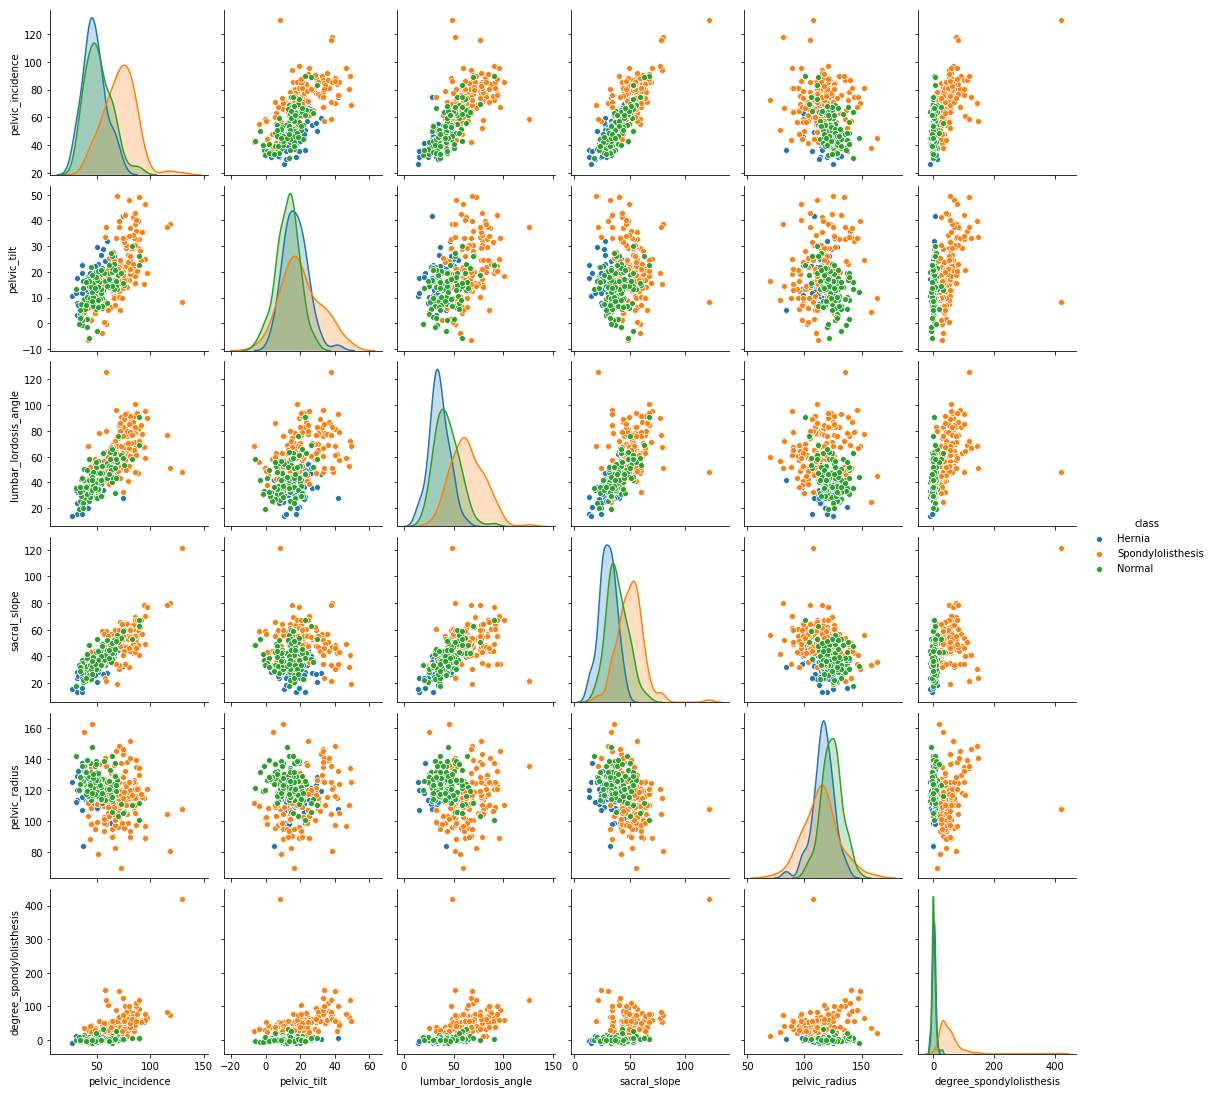

In [26]:
# Explore data visually with multple scatter plots
sns.pairplot(df, hue='class')

In [27]:
# Summarise
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## Step 2: Preprocess data
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean. 
	
Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [28]:
# Split dataset into 80% train and 20% validation
X = df.drop('class', axis=1)
y = df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.

We create the model and fit the model to the data we prepared for training.
	
We then proceed to classifying with the data we prepared for validation.
	
Lastly, we evaluate the model's performance with mainstream classification metrics. 

In [29]:
# Build model and train data
classifier = KNeighborsClassifier(n_neighbors=3)
knn = classifier.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
# Apply model to validation data
y_predict = classifier.predict(X_val)

In [31]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual: ': y_val,
                     'Prediction: ': y_predict})
actual_vs_predict.head(10)

,Actual:,Prediction:
300,Normal,Normal
145,Spondylolisthesis,Spondylolisthesis
302,Normal,Hernia
222,Normal,Spondylolisthesis
52,Hernia,Hernia
279,Normal,Normal
22,Hernia,Normal
171,Spondylolisthesis,Normal
191,Spondylolisthesis,Spondylolisthesis
245,Normal,Normal


In [32]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
                    precision    recall  f1-score   support

           Hernia       0.56      0.38      0.45        13
           Normal       0.57      0.68      0.62        19
Spondylolisthesis       0.93      0.93      0.93        30

         accuracy                           0.74        62
        macro avg       0.68      0.67      0.67        62
     weighted avg       0.74      0.74      0.74        62



## More

If you found this work interesting, you might like:

* Machine Learning Starters

* Deep Learning Starters

* Natural Language Processing Starters

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starters/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/